<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/fifa/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** Hotel Bookings
  
Last update: September, 2025

In [ ]:
%pip install numpy 
%pip install pandas 
%pip install matplotlib 
%pip install seaborn 
%pip install pingouin
%pip install --upgrade ydata-profiling

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime
from scipy.stats import chi2_contingency
from ydata_profiling import ProfileReport

In [3]:
# Panadas configuration to extend the number of rows and columns to visualize by default
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format

### Load the data

In [4]:
# Loading the CSV file as a dataframe
reservas = pd.read_csv('./data/hotel_bookings_modified.csv')

/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_42066/1840387268.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  reservas = pd.read_csv('./data/hotel_bookings_modified.csv')


In [5]:
# Showing the dataframe dimensions
print(reservas.shape)

# Showing the column data types
print(reservas.dtypes)

# Showing the top 5 rows
reservas.head(5)

(58895, 33)
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.00,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0.00,Transient,98.00,0.00,1.00,Check-Out,2015-07-03,NaN


### Explore the *Categorical* columns

In [6]:
categorial_columns = ['hotel','is_canceled','meal','country','market_segment','distribution_channel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','assigned_room_type','reserved_room_type','deposit_type','agent','company','customer_type','reservation_status']
total = reservas.shape[0]
print(total)
for column in categorial_columns:
    frecuencias = reservas[column].value_counts()
    schema = {'Categoria': frecuencias.index,
         'Valor': frecuencias.values}
    
    df = pd.DataFrame(schema)
    
    df['Proporcion'] = df['Valor']/total
    print('Nombre atributo: ', column)
    print(df)
    print("-----------------------------------")

58895
Nombre atributo:  hotel
      Categoria  Valor  Proporcion
0  Resort Hotel  40063        0.68
1    City Hotel  18832        0.32
-----------------------------------
Nombre atributo:  is_canceled
   Categoria  Valor  Proporcion
0          0  34666        0.59
1          1  24229        0.41
-----------------------------------
Nombre atributo:  meal
   Categoria  Valor  Proporcion
0         BB  45060        0.77
1         HB  10096        0.17
2         SC   1780        0.03
3  Undefined   1169        0.02
4         FB    790        0.01
-----------------------------------
Nombre atributo:  country
    Categoria  Valor  Proporcion
0         PRT  27559        0.47
1         GBR   7595        0.13
2         ESP   5275        0.09
3         FRA   3037        0.05
4         IRL   2371        0.04
..        ...    ...         ...
136       BHR      1        0.00
137       BDI      1        0.00
138       SYR      1        0.00
139       UGA      1        0.00
140       GAB      1       

In [7]:
reservas['Id'] = np.arange(len(reservas))
reservas.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids', 'Id'],
      dtype='object')

## Cantidad de Reservas y Tasa de Cancelacion por Hotel

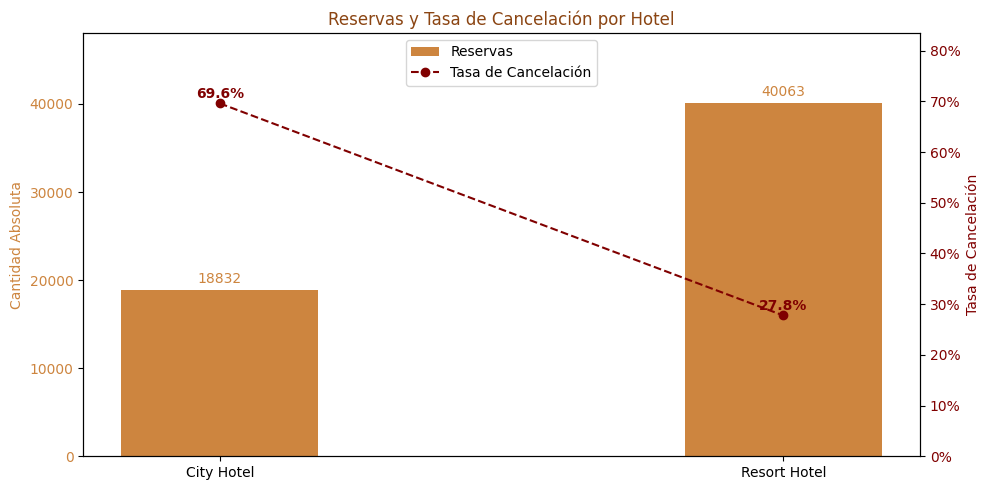

In [147]:
pivot = reservas.pivot_table(index=['hotel'], columns='is_canceled', values='Id', aggfunc='count')
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})

labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
total = renamed['Total']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x , total, width, label='Reservas', color='peru')
# rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas y Tasa de Cancelación por Hotel', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.set_ylim(0, max(total) * 1.2) 
ax.bar_label(rects1, padding=3, color = 'peru')
#ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper center')

fig.tight_layout()
fig.savefig('Hotel.png')
plt.show()

## Cantidad de Reservas y Tasa de Cancelacion por Tipo de Comida

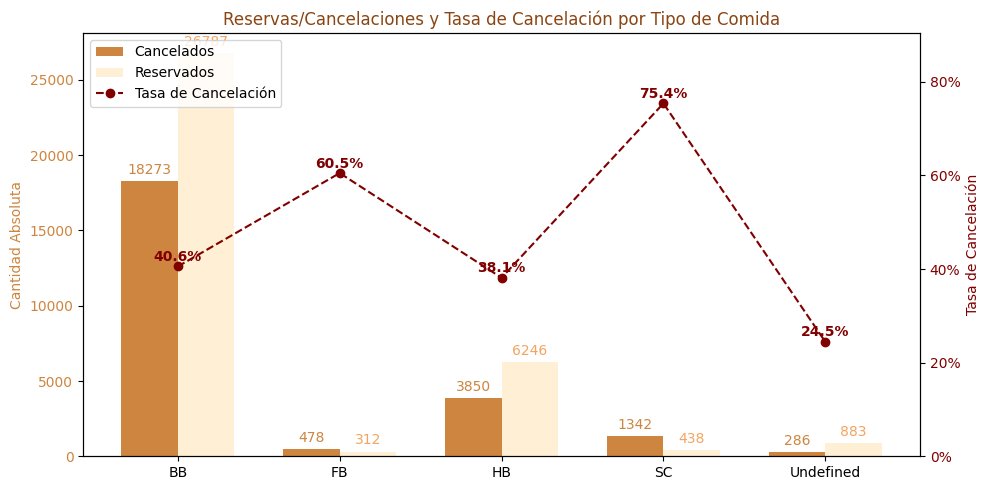

In [14]:
pivot = reservas.pivot_table(index=['meal'], columns='is_canceled', values='Id', aggfunc='count')
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})

labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Tipo de Comida', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper left')

fig.tight_layout()
plt.show()

## Cantidad de Reservas y Tasa de Cancelacion por Segmento de mercado

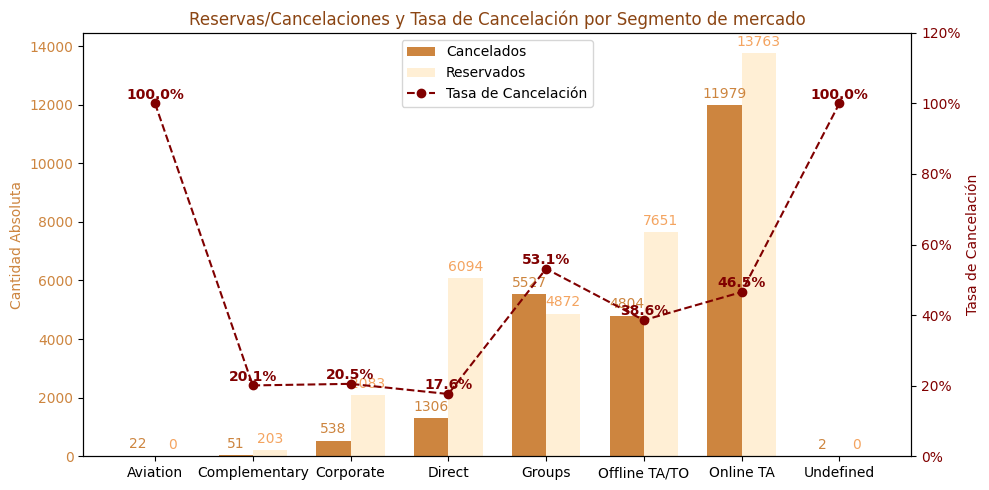

In [12]:
pivot = reservas.pivot_table(index=['market_segment'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
print(renamed['Caracteristica'].count()) 

labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Segmento de mercado', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper center')

fig.tight_layout()
plt.show()

## Cantidad de Reservas y Tasa de Cancelacion por Canal de Distribución

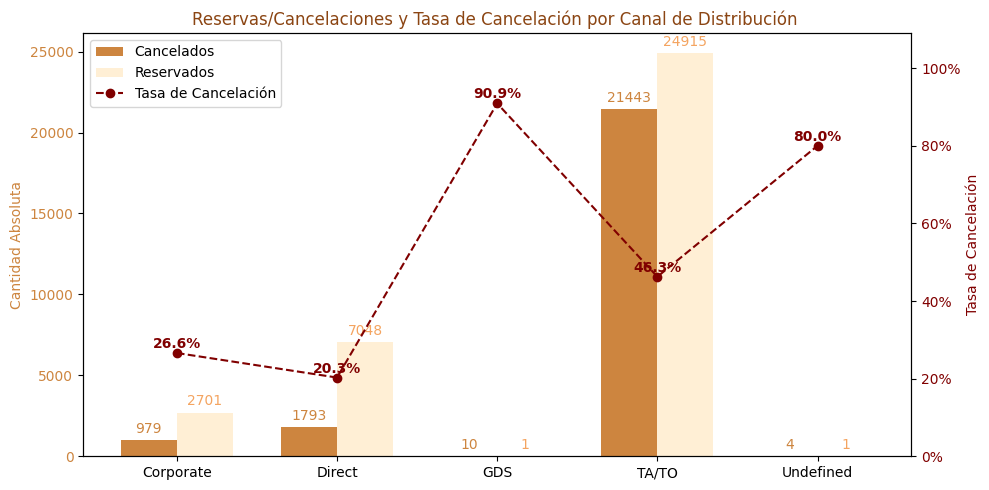

In [14]:
pivot = reservas.pivot_table(index=['distribution_channel'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})

labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Canal de Distribución ', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper left')

fig.tight_layout()
plt.show()

## Cantidad de Reservas y Tasa de Cancelacion por Tipo de Depósito

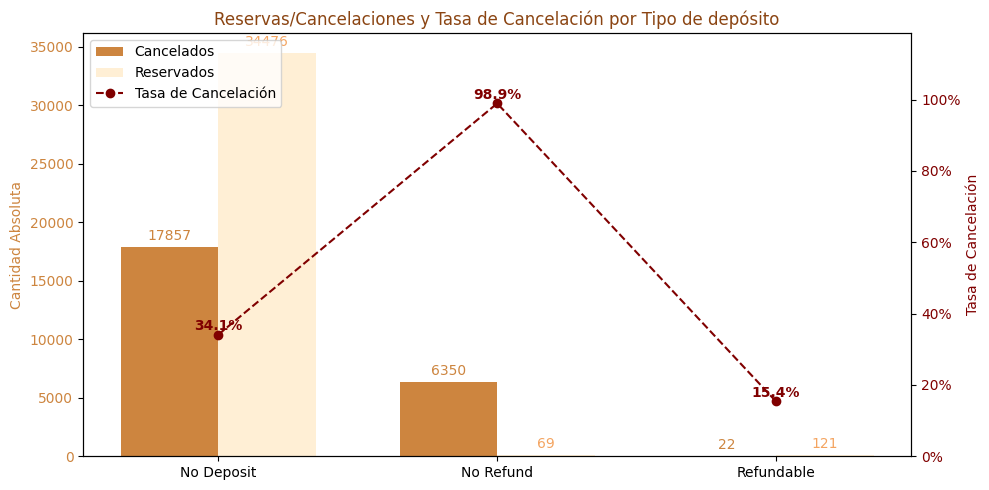

In [17]:
reservas['deposit_type'] = reservas['deposit_type'].map(lambda x : x.replace('Non Refund','No Refund'))

pivot = reservas.pivot_table(index=['deposit_type'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})

labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Tipo de depósito', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper left')

fig.tight_layout()
plt.show()

## Cantidad de Reservas y Tasa de Cancelacion por Tipo de Cliente

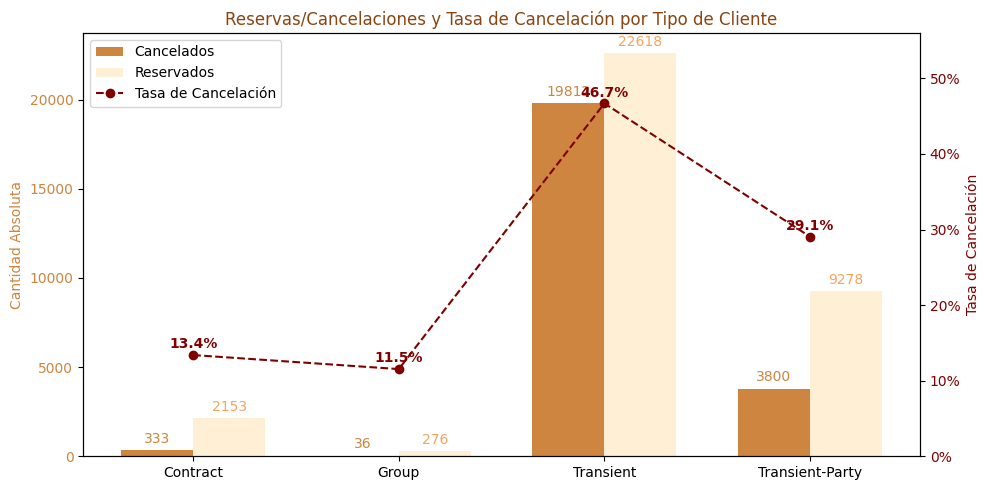

In [23]:
pivot = reservas.pivot_table(index=['customer_type'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})

labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Tipo de Cliente', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper left')

fig.tight_layout()
plt.show()

## Tipo de Habitación (Reservada y Asignada)

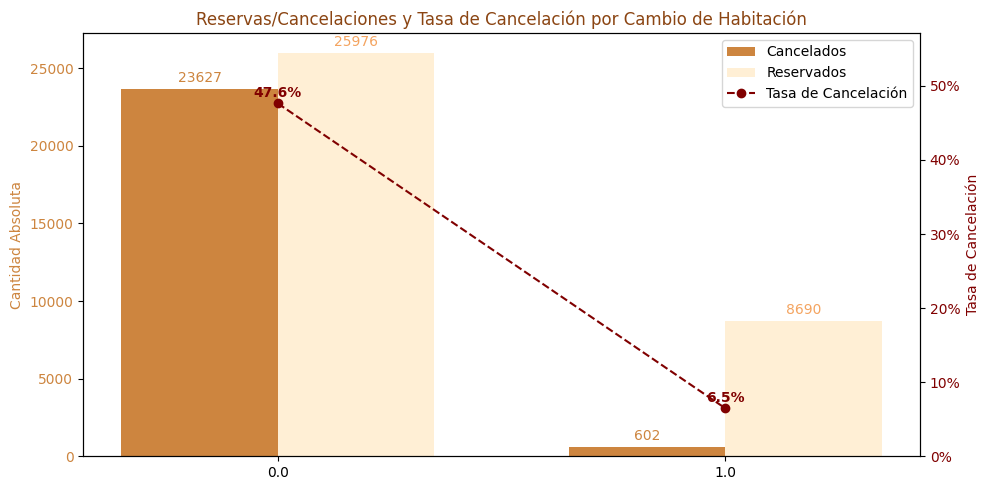

In [21]:
reservas.loc[reservas['reserved_room_type'] == reservas['assigned_room_type'], 'CambioHabitacion'] = 0
reservas.loc[reservas['reserved_room_type'] != reservas['assigned_room_type'], 'CambioHabitacion'] = 1
reservas[['CambioHabitacion','reserved_room_type','assigned_room_type']].head()

labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Cambio de Habitación', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper right')

fig.tight_layout()
plt.show()

### Cambio de Habitación (Reservada y Asignada)
Se asume como mejoramiento si la habitación asignada es mayor (A>)que la habitación reservada

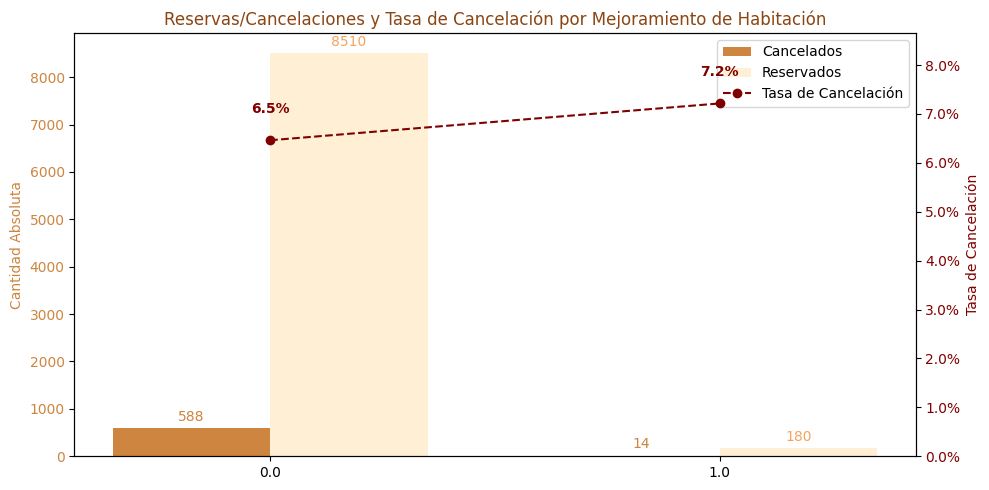

In [24]:
reservas.loc[(reservas['CambioHabitacion'] == 1) & (reservas['reserved_room_type'] < reservas['assigned_room_type']),'Mejoramiento'] = 0
reservas.loc[(reservas['CambioHabitacion'] == 1) & (reservas['reserved_room_type'] > reservas['assigned_room_type']),'Mejoramiento'] = 1
reservas.loc[reservas['CambioHabitacion'] == 0, 'Mejoramiento'] = np.nan

pivot = reservas[reservas['CambioHabitacion']==1].pivot_table(index=['Mejoramiento'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Mejoramiento de Habitación', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper right')

fig.tight_layout()
plt.show()

## Cantidad de Reservas y Tasa de Cancelacion por Cambios Reserva

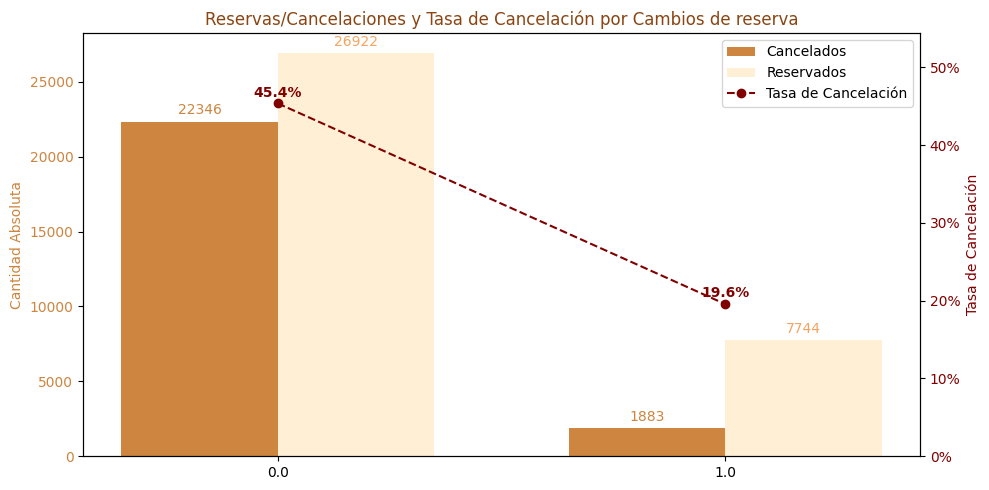

In [173]:
reservas.loc[reservas['booking_changes'] == 0, 'changed'] = 0
reservas.loc[reservas['booking_changes'] > 0, 'changed'] = 1

pivot = reservas.pivot_table(index=['changed'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})

labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Cambios de reserva', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper right')

fig.tight_layout()
plt.show()

### Análisis por Comportamiento Anterior

Hay reservas que fueron clasificadas como huesped anterior pero no tienen cancelaciones o reservas no canceladas previas, igual como hay reservas que se clasificaron como que no ha sido huesped anterior pero si tiene cancelaciones o reservas no canceladas previas

In [167]:
huespedes_ant = reservas[['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled']]

huespedes_ant.loc[huespedes_ant['previous_cancellations'] <= 0, 'prev_cancelations'] = 0
huespedes_ant.loc[huespedes_ant['previous_cancellations'] > 0, 'prev_cancelations'] = 1


huespedes_ant.loc[huespedes_ant['previous_bookings_not_canceled'] <= 0, 'prev_asistences'] = 0
huespedes_ant.loc[huespedes_ant['previous_bookings_not_canceled'] > 0, 'prev_asistences'] = 1


huespedes_ant.loc[(huespedes_ant['prev_cancelations'] <= 0) & (huespedes_ant['prev_cancelations'] <= 0), 'repeated_guest'] = 0
huespedes_ant.loc[(huespedes_ant['prev_cancelations'] == 1) | (huespedes_ant['prev_cancelations'] == 1), 'repeated_guest'] = 1

# huespedes = huespedes_ant.groupby(['is_repeated_guest','prev_cancelations','prev_asistences']).size().reset_index()
huespedes_ant.groupby(['repeated_guest','is_repeated_guest']).agg('count').head()
#huespedes_ant.loc[huespedes_ant['repeated_guest'] == 1].head()

/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_42066/3463782180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huespedes_ant.loc[huespedes_ant['previous_cancellations'] <= 0, 'prev_cancelations'] = 0
/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_42066/3463782180.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huespedes_ant.loc[huespedes_ant['previous_bookings_not_canceled'] <= 0, 'prev_asistences'] = 0
/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_42066/3463782

previous_cancellations  \
repeated_guest is_repeated_guest                           
0.00           0                                   56207   
               1                                    1593   
1.00           0                                     910   
               1                                     185   

                                  previous_bookings_not_canceled  \
repeated_guest is_repeated_guest                                   
0.00           0                                           56207   
               1                                            1593   
1.00           0                                             910   
               1                                             185   

                                  prev_cancelations  prev_asistences  
repeated_guest is_repeated_guest                                      
0.00           0                              56207            56207  
               1                               1593             1593  
1.00           0                                910              910  
               1                                185              185

### Explore the *Cuantitative* columns

In [27]:
# Getting the main statistics for the Value column
reservas[['lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']].describe(include='all')

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,58895.00,58307.00,58895,58895.00,58895.00,58895.00,58895.00,58895.00,58891.00,58895.00,58895.00,58894.00,58894.00,58306.00,58894.00
unique,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,7715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,100.05,2205.52,NaN,27.84,15.77,1.06,2.85,1.97,0.11,0.14,0.24,3.53,96.25,0.10,0.51
std,101.16,1837.39,NaN,13.35,8.78,1.09,2.24,2.94,0.42,3.12,0.70,21.84,58.56,0.30,0.77
min,0.00,2015.00,NaN,1.00,1.00,0.00,0.00,-1.00,0.00,-1.00,0.00,0.00,-6.38,0.00,0.00
25%,17.00,2016.00,NaN,17.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,60.00,0.00,0.00
50%,69.00,2016.00,NaN,29.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,84.00,0.00,0.00
75%,157.00,2016.00,NaN,38.00,23.00,2.00,4.00,2.00,0.00,0.00,0.00,0.00,120.00,0.00,1.00


### Análisis por Fecha
Se realiza un análisis tanto como línea de tiempo como estacional según el mes del año

In [28]:
## Modificacion mes llegada
reservas['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [29]:
reservas['mes_llegada'] = reservas['arrival_date_month'].map(lambda x : datetime.strptime(x,'%B') if x!= None else 0)
reservas['mes_llegada'] = reservas['mes_llegada'].map(lambda x : datetime.strftime(x,'%-m') if x!= None else 0)
reservas['mes_llegada'].unique()

array(['7', '8', '9', '10', '11', '12', '1', '2', '3', '4', '5', '6'],
      dtype=object)

In [30]:
## Limpieza año llegada
reservas['arrival_date_year'].unique()

array([ 2015.,    nan, 20016.,  2016.,  2017.])

In [31]:
reservas['arrival_date_year'] = reservas['arrival_date_year'].map(lambda x: 2016 if x == 20016 else x)
reservas['arrival_date_year'].unique()

array([2015.,   nan, 2016., 2017.])

In [32]:
reservas['arrival_date_day_of_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

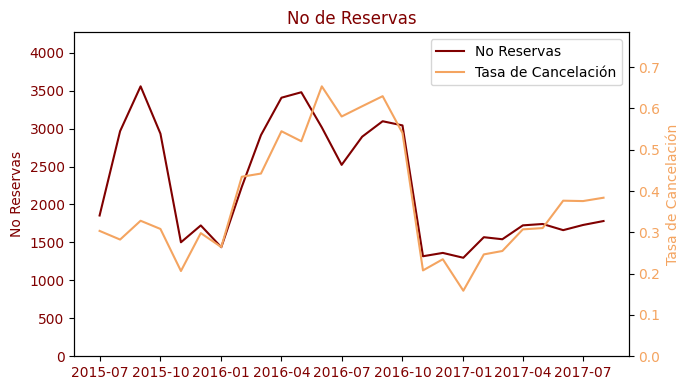

In [194]:
reservas['fecha'] = pd.to_datetime({'year': reservas['arrival_date_year'], 'month': reservas['mes_llegada'], 'day': 1})
pivot = reservas.pivot_table(index=['fecha'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})

labels = renamed['Caracteristica']
total = renamed['Total']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

fig, axs = plt.subplots( figsize=(7,4))

axs.plot(labels, total, label='No Reservas',color='maroon')
axs.set_title('No de Reservas',color ='maroon')
axs.set_ylabel('No Reservas',color ='maroon')
axs.tick_params(axis='x', labelcolor='maroon')
axs.tick_params(axis='y', labelcolor='maroon')
axs.set_ylim(0, max(renamed['Total']) * 1.2) 

ax2 = axs.twinx() # 'ax2' es el eje Y secundario (derecho)

ax2.plot(labels, tasa_cancelacion, label='Tasa de Cancelación',color='sandybrown')
ax2.set_ylabel('Tasa de Cancelación',color ='sandybrown')
ax2.tick_params(axis='y', labelcolor='sandybrown')
ax2.set_ylim(0, max(renamed['TasaCancelacion']) * 1.2) 

h1, l1 = axs.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
axs.legend(h1+h2, l1+l2, loc='upper right')
plt.tight_layout()
plt.show()

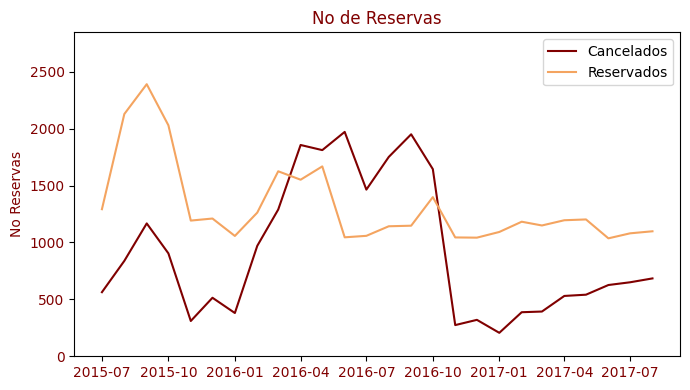

In [191]:
fig, axs = plt.subplots( figsize=(7,4))

axs.plot(labels, cancelados, label='Cancelados',color='maroon')
axs.plot(labels, reservados, label='Reservados',color='sandybrown')
axs.set_title('No de Reservas',color ='maroon')
axs.set_ylabel('No Reservas',color ='maroon')
axs.tick_params(axis='x', labelcolor='maroon')
axs.tick_params(axis='y', labelcolor='maroon')
axs.set_ylim(0, max(renamed['Total']) * 0.8) 


h1, l1 = axs.get_legend_handles_labels()
axs.legend(h1, l1, loc='upper right')
plt.tight_layout()
plt.show()

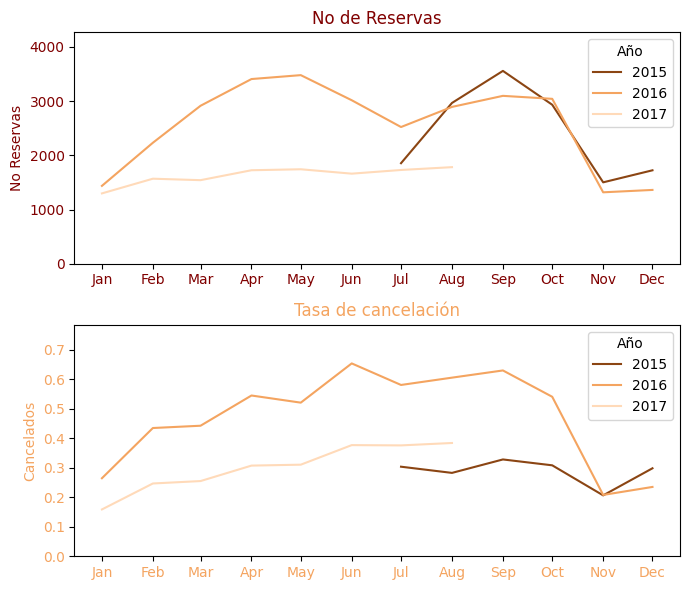

In [192]:
renamed['year'] = renamed['Caracteristica'].dt.year
renamed['month_day'] = renamed['Caracteristica'].dt.strftime('%m-%d') # Format as "MM-DD"
renamed['month_day_date'] = pd.to_datetime('2000-' + renamed['month_day'])
unique_years = sorted(renamed['year'].unique())


colors = ['#8B4513','#F4A460','#FFDAB9']

fig, axs = plt.subplots(2, 1, figsize=(7,6))

for i, year in enumerate(unique_years):
    df_year = renamed[renamed['year'] == year]
    axs[0].plot(df_year['month_day_date'], df_year['Total'], label=str(year),color=colors[i % len(colors)])
    
axs[0].legend(title='Año')
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[0].set_title('No de Reservas',color ='maroon')
axs[0].set_ylabel('No Reservas',color ='maroon')
axs[0].tick_params(axis='x', labelcolor='maroon')
axs[0].tick_params(axis='y', labelcolor='maroon')
axs[0].set_ylim(0, max(renamed['Total']) * 1.2) 


for i, year in enumerate(unique_years):
    df_year = renamed[renamed['year'] == year]
    axs[1].plot(df_year['month_day_date'], df_year['TasaCancelacion'], label=str(year),color=colors[i % len(colors)])
    
axs[1].legend(title='Año')   
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[1].set_title('Tasa de cancelación', color='sandybrown')
axs[1].set_ylabel('Cancelados',color='sandybrown')
axs[1].tick_params(axis='x', labelcolor='sandybrown')
axs[1].tick_params(axis='y', labelcolor='sandybrown')
axs[1].set_ylim(0, max(renamed['TasaCancelacion']) * 1.2) 




axs[1].legend(title='Año')
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b')) # %b for abbreviated month names


# Adjust the layout to prevent titles and labels from overlapping
plt.tight_layout()
plt.show()
fig.savefig("Tasa por Año.png")

### Análisis por tiempo de anticipación

0
737


/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_42066/3421052317.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = reservas.pivot_table(index=['rango'], columns='is_canceled', values='Id', aggfunc='count')


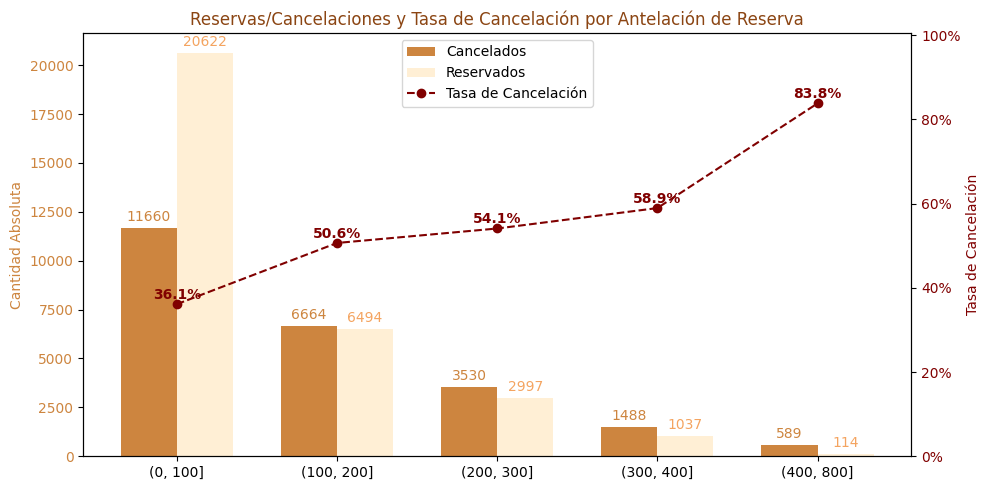

In [193]:
print(min(reservas['lead_time']))
print(max(reservas['lead_time']))

intervalos = [0, 100, 200, 300,400,800]
reservas['rango'] = pd.cut(reservas['lead_time'], bins=intervalos)

pivot = reservas.pivot_table(index=['rango'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})

labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5)) # 'ax' es el eje Y principal (izquierdo)

# Graficar las barras en el eje principal 'ax'
rects1 = ax.bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax.bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax.twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax.set_ylabel('Cantidad Absoluta', color='peru')
ax.set_title('Reservas/Cancelaciones y Tasa de Cancelación por Antelación de Reserva', color ='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelcolor='peru')
ax.bar_label(rects1, padding=3, color = 'peru')
ax.bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper center')

fig.tight_layout()
plt.show()

## Análisis por duración y tipo estadía

In [41]:
reservas['totalNoches'] = reservas['stays_in_weekend_nights']+ reservas['stays_in_week_nights']
reservas['proporcionWeekend'] = reservas['stays_in_weekend_nights']/reservas['totalNoches']

reservas[['stays_in_weekend_nights','stays_in_week_nights','totalNoches','proporcionWeekend']].describe(include='all')

In [43]:
intervalos = [0, 1, 2, 3,4,5,7,10,50]
reservas['rangoweek'] = pd.cut(reservas['stays_in_week_nights'], bins=intervalos)

intervalos = [0, 1, 2, 3,4,20]
reservas['rangoweekend'] = pd.cut(reservas['stays_in_weekend_nights'], bins=intervalos)

intervalos = [0, 1, 2, 3,4,5,7,10,70]
reservas['rangoTotal'] = pd.cut(reservas['totalNoches'], bins=intervalos)

pivot = reservas.pivot_table(index=['rangoweek'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})

/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_42066/1220733797.py:46: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = reservas.pivot_table(index=['rangoweekend'], columns='is_canceled', values='Id', aggfunc='count')
/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_42066/1220733797.py:97: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = reservas.pivot_table(index=['rangoTotal'], columns='is_canceled', values='Id', aggfunc='count')


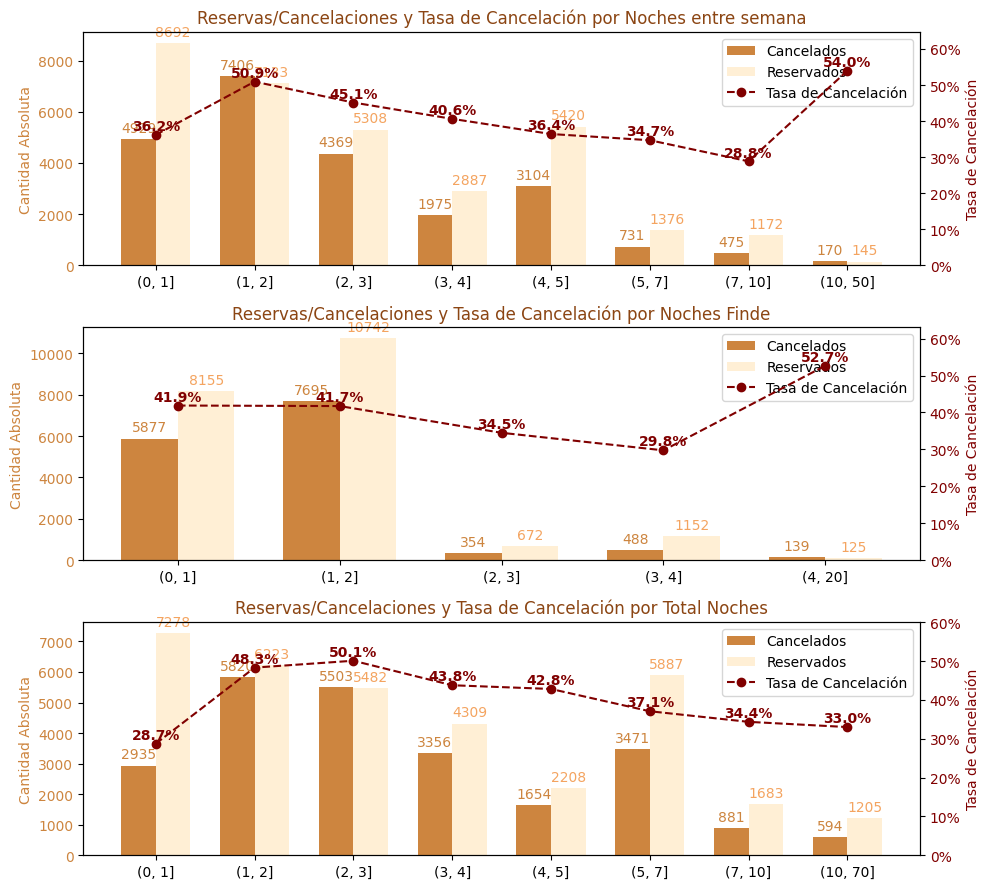

In [45]:
labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(3, 1, figsize=(10, 9))

# Graficar las barras en el eje principal 'ax'
rects1 = ax[0].bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax[0].bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax[0].twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax[0].set_ylabel('Cantidad Absoluta', color='peru')
ax[0].set_title('Reservas/Cancelaciones y Tasa de Cancelación por Noches entre semana', color ='saddlebrown')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].tick_params(axis='y', labelcolor='peru')
ax[0].bar_label(rects1, padding=3, color = 'peru')
ax[0].bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax[0].get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax[0].legend(h1+h2, l1+l2, loc='upper right')

##################################################################################################################
##################################################################################################################
##################################################################################################################

pivot = reservas.pivot_table(index=['rangoweekend'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})

labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']
x = np.arange(len(labels))
width = 0.35

rects1 = ax[1].bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax[1].bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax22 = ax[1].twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax22.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax22.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax[1].set_ylabel('Cantidad Absoluta', color='peru')
ax[1].set_title('Reservas/Cancelaciones y Tasa de Cancelación por Noches Finde', color ='saddlebrown')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].tick_params(axis='y', labelcolor='peru')
ax[1].bar_label(rects1, padding=3, color = 'peru')
ax[1].bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax22.set_ylabel('Tasa de Cancelación', color='maroon')
ax22.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax22.tick_params(axis='y', labelcolor='maroon')
ax22.set_ylim(0, max(tasa_cancelacion) * 1.2) 


# Unificar las leyendas de ambos ejes ---
h1, l1 = ax[1].get_legend_handles_labels()
h2, l2 = ax22.get_legend_handles_labels()
ax[1].legend(h1+h2, l1+l2, loc='upper right')


##################################################################################################################
##################################################################################################################
##################################################################################################################

pivot = reservas.pivot_table(index=['rangoTotal'], columns='is_canceled', values='Id', aggfunc='count')
pivot = pivot.fillna(0)
pivot['Total'] = pivot[0] + pivot[1]
pivot['TasaCancelacion'] = pivot[1]/pivot['Total'] 

reset = pivot.reset_index(names=['Caracteristica'])
renamed  = reset.rename(columns={0: 'SinCancelar', 1: 'Cancelados'})

labels = renamed['Caracteristica']
cancelados = renamed['Cancelados']
reservados = renamed['SinCancelar']
tasa_cancelacion = renamed['TasaCancelacion']
x = np.arange(len(labels))
width = 0.35

rects1 = ax[2].bar(x - width/2, cancelados, width, label='Cancelados', color='peru')
rects2 = ax[2].bar(x + width/2, reservados, width, label='Reservados', color='papayawhip')

ax2 = ax[2].twinx() # 'ax2' es el eje Y secundario (derecho)
line = ax2.plot(x, tasa_cancelacion, color='maroon', marker='o', linestyle='--', label='Tasa de Cancelación')

for i, rate in enumerate(tasa_cancelacion):
    label = f'{rate:.1%}'
    ax2.text(i, rate + 0.005, label, ha='center', va='bottom', color='maroon', fontsize=10, fontweight='bold')

# Eje principal (izquierdo)
ax[2].set_ylabel('Cantidad Absoluta', color='peru')
ax[2].set_title('Reservas/Cancelaciones y Tasa de Cancelación por Total Noches', color ='saddlebrown')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].tick_params(axis='y', labelcolor='peru')
ax[2].bar_label(rects1, padding=3, color = 'peru')
ax[2].bar_label(rects2, padding=3, color ='sandybrown')

# Eje secundario (derecho)
ax2.set_ylabel('Tasa de Cancelación', color='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  
ax2.tick_params(axis='y', labelcolor='maroon')
ax2.set_ylim(0, max(tasa_cancelacion) * 1.2) 

# Unificar las leyendas de ambos ejes ---
h1, l1 = ax[2].get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax[2].legend(h1+h2, l1+l2, loc='upper right')


fig.tight_layout()
plt.show()

In [ ]:
## Limpieza adultos
reservas['adults'].value_counts()
reservas = reservas[~reservas['adults'].isin([0,-1])]
reservas['adults'].value_counts()

#Children no requiere limpieza

## Limpieza babies
reservas['babies'].value_counts()
reservas = reservas[~reservas['babies'].isin([-1])]
reservas['babies'].value_counts()